In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,SimpleRNN,GRU
from tensorflow.keras.models import Sequential
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
imdb=pd.read_csv('/content/drive/MyDrive/IT Sector /csv files/review.csv')

In [3]:
imdb.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


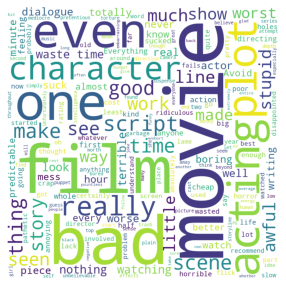

In [4]:
wc=WordCloud(width=800,
             height=800,
             background_color='white',
             min_font_size=10)
wc.generate(''.join(imdb[imdb['sentiment']==0]['review']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

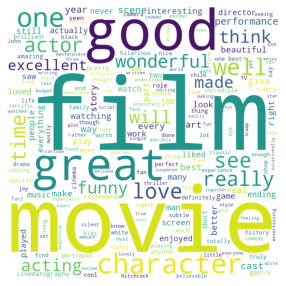

In [5]:
wc=WordCloud(width=800,
             height=800,
             background_color='white',
             min_font_size=10)
wc.generate(''.join(imdb[imdb['sentiment']==1]['review']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [6]:
# Data Cleaning

In [7]:
def clean_text(text):
  stop=stopwords.words('english') # gathering stopwords list
  punc=list(punctuation)        # gathering punctuation list
  bad_tokens=stop+punc
  lemma=WordNetLemmatizer()
  tokens=word_tokenize(text)     # NLTK tokenization
  word_tokens=[t for t in tokens if t.isalpha()]      # only alphabets are kept rest punchuations,numbers are removed
  # Lemmatization,stopwords & punctuation removal, to lower case
  clean_token=[lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
  return " ".join(clean_token)

In [8]:
imdb['review']=imdb['review'].apply(clean_text)


In [9]:
imdb['review'].head()

0    not sure lost flat character audience nearly h...
1    attempting artiness black white clever camera ...
2                     very little music anything speak
3    the best scene movie gerardo trying find song ...
4    the rest movie lack art charm meaning if empti...
Name: review, dtype: object

In [10]:
x=imdb['review']
y=imdb['sentiment']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
sent_len=[]
for sent in imdb['review']:
  sent_len.append(len(word_tokenize(sent)))
imdb['sent_len']=sent_len
imdb.head()

,Unnamed: 0,review,sentiment,sent_len
0,0,not sure lost flat character audience nearly h...,0,9
1,1,attempting artiness black white clever camera ...,0,17
2,2,very little music anything speak,0,5
3,3,the best scene movie gerardo trying find song ...,1,11
4,4,the rest movie lack art charm meaning if empti...,0,13


In [13]:
max(sent_len)
# since the no. of units should be equal to no. of words hence we provide maximum no. of units and rest will it automatically convert to 0

39

In [14]:
np.quantile(sent_len,0.95)
# means 95% documents have length equal to or lless than 18


18.0

In [15]:
max_len=18


In [16]:
# Keras Tokenisation
# it does tokenisation with providing unique identification no. each word
tok=Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(x_train)
# since we do not want tokenisation on character level as we want on word level hnece its falsewith condition that split to be done where their is a space

In [17]:
tok.index_word

{1: 'i',
 2: 'movie',
 3: 'the',
 4: 'film',
 5: 'it',
 6: 'this',
 7: 'one',
 8: 'bad',
 9: 'character',
 10: 'good',
 11: 'like',
 12: 'time',
 13: 'even',
 14: 'acting',
 15: 'really',
 16: 'great',
 17: 'well',
 18: 'scene',
 19: 'see',
 20: 'story',
 21: 'make',
 22: 'actor',
 23: 'best',
 24: 'work',
 25: 'but',
 26: 'made',
 27: 'could',
 28: 'plot',
 29: 'think',
 30: 'thing',
 31: 'look',
 32: 'ever',
 33: 'seen',
 34: 'script',
 35: 'love',
 36: 'better',
 37: 'way',
 38: 'wonderful',
 39: 'would',
 40: 'year',
 41: 'real',
 42: 'also',
 43: 'there',
 44: 'much',
 45: 'watch',
 46: 'watching',
 47: 'line',
 48: 'performance',
 49: 'part',
 50: 'never',
 51: 'excellent',
 52: 'stupid',
 53: 'show',
 54: 'cast',
 55: 'life',
 56: 'anyone',
 57: 'little',
 58: 'go',
 59: 'a',
 60: 'nothing',
 61: 'get',
 62: 'every',
 63: 'know',
 64: 'give',
 65: 'people',
 66: 'two',
 67: 'if',
 68: 'music',
 69: 'recommend',
 70: 'funny',
 71: 'all',
 72: 'say',
 73: 'pretty',
 74: 'dialogue'

In [18]:
vocab_len=len(tok.index_word)
vocab_len
# to know no. unique words

2328

In [19]:
sequences_train=tok.texts_to_sequences(x_train)
# each word in sentence is converted into vector

In [20]:
sequences_train


[[3, 198, 133, 869, 24, 134, 118, 84, 338],
 [7, 119, 339, 2, 1, 32, 33],
 [5, 870, 2, 10],
 [25, 340, 199, 44, 871, 341, 342],
 [155,
  872,
  873,
  343,
  3,
  53,
  344,
  156,
  8,
  200,
  13,
  518,
  258,
  3,
  54,
  345,
  346,
  347,
  874,
  258,
  3,
  53],
 [875,
  876,
  32,
  16,
  519,
  201,
  20,
  877,
  348,
  202,
  878,
  879,
  880,
  203,
  881,
  882,
  201,
  120,
  204,
  259],
 [1, 29, 4, 349, 883, 520, 884, 62, 85],
 [3, 205, 9, 206, 1, 260, 885],
 [5, 15, 10, 53, 45],
 [5, 521, 886, 207, 350, 157, 351, 887, 9, 55],
 [888, 889, 890],
 [71, 84, 522, 4, 891, 892, 893, 894, 54],
 [5, 261],
 [1,
  523,
  86,
  8,
  352,
  4,
  133,
  1,
  15,
  11,
  208,
  4,
  8,
  1,
  158,
  7,
  159,
  56,
  27,
  524],
 [1, 895, 121, 135, 8, 72],
 [20, 525, 896, 897, 898, 526, 40, 527, 15, 528, 899, 529, 530, 9, 900],
 [353, 63, 1, 262],
 [3, 34, 34],
 [1, 63, 901, 902, 354, 27, 44, 903, 17, 904],
 [71, 1, 64, 7, 905],
 [355,
  121,
  2,
  531,
  13,
  906,
  1,
  72,
  

In [21]:
 x_train

382    the set especially designed work camera amazin...
904               one boring pointless movie i ever seen
981                                    it sad movie good
47         but whatever cost much translate quality sure
521    rating grade z note the show is so bad that ev...
                             ...                        
767    p scene movie cool central character find room...
72                           there generally great thing
908    i understand garbage got shelf movie store eve...
235               the worst sappiest dialogue i could go
37                                    it pure brilliance
Name: review, Length: 799, dtype: object

In [22]:
# to make all sentence of equal length
# Padding Technique
sequences_matrix_train=sequence.pad_sequences(sequences_train,maxlen=max_len)

In [23]:
sequences_matrix_train

array([[  0,   0,   0, ..., 118,  84, 338],
       [  0,   0,   0, ...,   1,  32,  33],
       [  0,   0,   0, ..., 870,   2,  10],
       ...,
       [  0,   0,   0, ...,  13,  41,   2],
       [  0,   0,   0, ...,   1,  27,  58],
       [  0,   0,   0, ...,   5, 455, 813]], dtype=int32)

In [24]:
# first document
sequences_matrix_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 198, 133, 869,
        24, 134, 118,  84, 338], dtype=int32)

In [25]:
# since all words arenot converted into array except 0 they are just given unique no. hence the embeding function takes care of this,
# Embeding layer converts Word into Vector
# vocab len represnts all words and +1 represnt 0, 500 is taken since the vector of each words if consider unique length for reach word the vector length for each word will be very large hence to avoid this the output length of 500 i.e one word represnted by vector length of 500
# input len=max_len reprented by 18 
# mask o = true, means the above 0 in maatrix has no value to ignore it
# 32 neurons in 1 RNN
# RNN layer captures the sequence of words

# model=Sequential()
# model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# model.add(SimpleRNN(32,activation='tanh'))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
# # Output Layer
# model.add(Dense(1,activation='sigmoid'))


In [26]:
# Using LSTM 
# just use LSTM at place of SimpleRNN

In [27]:
# model=Sequential()
# model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# # model.add(SimpleRNN(32,activation='tanh'))
# model.add(LSTM(64,activation='tanh'))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
# # Output Layer
# model.add(Dense(1,activation='sigmoid'))

In [28]:
# Using GRU
# just use GRU at place of LSTM

In [29]:
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# model.add(SimpleRNN(32,activation='tanh'))
# model.add(LSTM(64,activation='tanh'))
model.add(GRU(64,activation='tanh'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 500)           1164500   
                                                                 
 gru (GRU)                   (None, 64)                108672    
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,275,285
Trainable params: 1,275,285
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
model.fit(sequences_matrix_train,y_train,batch_size=50,epochs=50)


Epoch 1/50
16/16 [==============================] - 5s 49ms/step - loss: 0.6882
Epoch 2/50
16/16 [==============================] - 1s 49ms/step - loss: 0.5932
Epoch 3/50
16/16 [==============================] - 1s 50ms/step - loss: 0.2745
Epoch 4/50
16/16 [==============================] - 1s 50ms/step - loss: 0.0645
Epoch 5/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0222
Epoch 6/50
16/16 [==============================] - 1s 49ms/step - loss: 0.0105
Epoch 7/50
16/16 [==============================] - 1s 50ms/step - loss: 0.0066
Epoch 8/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0046
Epoch 9/50
16/16 [==============================] - 1s 49ms/step - loss: 0.0040
Epoch 10/50
16/16 [==============================] - 1s 49ms/step - loss: 0.0035
Epoch 11/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0031
Epoch 12/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0028
Epoch 13/50
16/16 [==================

In [33]:
# Similary converting test data into vector


In [34]:
sequences_matrix_test=sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [35]:
sequences_matrix_test

array([[   0,    0,    0, ...,  203,  410,   34],
       [   0,    0,    0, ...,  131,    4,   21],
       [   0,    0,    0, ...,   13,   10,  434],
       ...,
       [   0,    0,    0, ...,    4,   32,   26],
       [   0,    0,    0, ...,   77,  186, 1827],
       [   0,    0,    0, ...,  271, 1820,   39]], dtype=int32)

In [36]:
y_pred=model.predict(sequences_matrix_test)

In [37]:
y_pred=np.where(y_pred>=0.5,1,0)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       102
           1       0.70      0.74      0.72        98

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200

